## Libraries and Dataset

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# pip install forex_python
from forex_python.converter import CurrencyRates
# pip install langdetect
from langdetect import detect, DetectorFactory
from matplotlib.backends.backend_pdf import PdfPages

dataset = pd.read_csv('cleaned_and_processed_all_data.csv', delimiter=';')

## Convert Currency for Denmark and Switzerland

In [2]:
dataset.loc[dataset['Country Code'] == 'DK', 'Price'] = CurrencyRates().convert('DKK', 'EUR', dataset[dataset['Country Code'] == 'DK']['Price'])
dataset.loc[dataset['Country Code'] == 'CH', 'Price'] = CurrencyRates().convert('CHF', 'EUR', dataset[dataset['Country Code'] == 'CH']['Price'])

In [3]:
dataset.loc[dataset['Country Code'] == 'CH', ['Price']]

,Price
207057,66.294157
207058,108.911829
207059,127.853016
207060,75.764750
207061,103.229472
...,...
209408,132.588313
209409,111.753007
209410,61.558860
209411,94.705938


## Calculate Price per Accomodation

In [4]:
dataset['Price/Accommodation'] = dataset['Price'] / dataset['Accommodates']
dataset[['Price', 'Accommodates', 'Price/Accommodation']]

,Price,Accommodates,Price/Accommodation
0,69.000000,4,17.250000
1,69.000000,2,34.500000
2,100.000000,3,33.333333
3,75.000000,2,37.500000
4,87.000000,3,29.000000
...,...,...,...
209410,61.558860,2,30.779430
209411,94.705938,2,47.352969
209412,42.617672,1,42.617672
209413,70.000000,5,14.000000


## <font color='green'>Graph: Comparing Accomodation Prices Between Countries</font>

In [5]:
country_names = []
avg_price = []

for country in dataset['Country Code'].unique():         
    country_names.append(country)
    avg_price.append(dataset.loc[dataset['Country Code'] == country, 
                                 ['Price/Accommodation']].mean().values[0])
avg_price

[21.987975416213974,
 24.651736061799937,
 30.455009092213043,
 32.369098014744786,
 23.152787933068154,
 15.570721170581546,
 27.752055850563128,
 48.3043099106177,
 25.415428390577798,
 45.11279020058292,
 16.285714285714285]

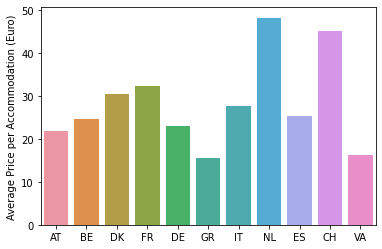

In [6]:
price_bar = sns.barplot(x=country_names, y=avg_price)
price_bar.set(ylabel='Average Price per Accommodation (Euro)')
plt.savefig('accommodation_price.png')
plt.show()

## <font color='green'> Comparing Popularity Based on Language </font>

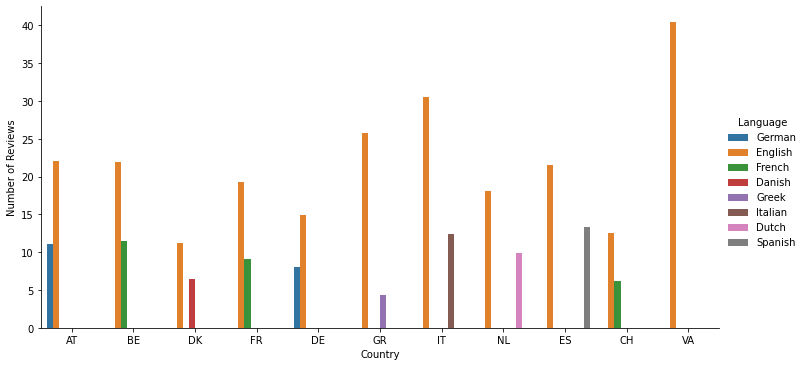

In [11]:
sns.catplot(x='Country', y='Number of Reviews', hue='Language',
            data=lang_df, ci=None, aspect=2, kind='bar')

plt.savefig('language_popularity_graph.png')
plt.show()

## <font color='green'> Worst Rated Airbnb by Review Polarity and Review Score Rating </font>

In [49]:
min_reviews = dataset[dataset['Number of Reviews'] >= 5]

In [73]:
worst = min_reviews.nsmallest(1, ['Review Scores Rating', 'review_polarity'])
worst.T

,148316
ID,9884602
Description,"Roof terrace, kitchen, 2 toilets, 1 bathroom, ..."
Host Since,2015-06-12
Host Response Time,within an hour
Host Response Rate,100.0
Host Listings Count,2.0
Host Total Listings Count,2.0
Host Verifications,"email,phone,reviews"
Neighbourhood Cleansed,De Baarsjes - Oud-West
City,Amsterdam


## <font color='green'> Best Rated Airbnb by Review Polarity and Review Score Rating </font>

In [76]:
best = min_reviews.nlargest(1, ['Review Scores Rating', 'review_polarity'])
best.T

,92739
ID,16853223
Description,I am renting out my lovely 50m2 apartment on t...
Host Since,2017-01-11
Host Response Time,within an hour
Host Response Rate,100.0
Host Listings Count,1.0
Host Total Listings Count,1.0
Host Verifications,"email,phone,reviews,jumio,offline_government_i..."
Neighbourhood Cleansed,Frankfurter Allee Süd FK
City,Berlin
